In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

CHƯƠNG I: Thu thập dữ liệu

In [ ]:
data=pd.read_csv('diabetes.csv')
data

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


CHƯƠNG II: Phân tích dữ liệu

In [ ]:
data.info()
# Kiểu dữ liệu của từng thuộc tính

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of times pregnant     768 non-null    int64  
 1   Plasma glucose               768 non-null    int64  
 2   Diastolic blood pressure     768 non-null    int64  
 3   Triceps skin fold thickness  768 non-null    int64  
 4   2-Hour serum insulin         768 non-null    int64  
 5   Body mass index              768 non-null    float64
 6   Diabetes pedigree function   768 non-null    float64
 7   Age                          768 non-null    int64  
 8   Class variable               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dữ liệu đều thuộc kiểu int, float nên ta ko cần phải transform,  ...

In [ ]:
data.isnull().sum()
# Tổng số lượng nan với từng thuộc tính

Number of times pregnant       0
Plasma glucose                 0
Diastolic blood pressure       0
Triceps skin fold thickness    0
2-Hour serum insulin           0
Body mass index                0
Diabetes pedigree function     0
Age                            0
Class variable                 0
dtype: int64

Không có dữ thiệu bị thiếu.

In [ ]:
data.describe()
# Dữ liệu thống kê

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ta nhận thấy các thuộc tính Plasma glucose	Diastolic blood pressure	Triceps skin fold thickness	2-Hour serum insulin	Body mass index có giá trị =0, trong thực tế ko thể xảy ra. Nên bước tiếp theo cần xử lý chúng

CHƯƠNG III: Tiền xử lý dữ liệu

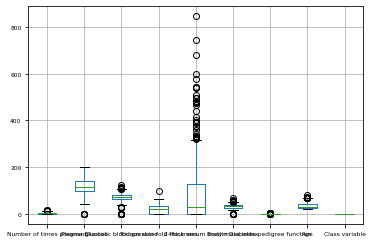

In [ ]:
data.boxplot(figsize=(13, 8),fontsize=6)
plt.show()

Xóa dữ liệu nhiễu: 2-Hour serum insulin >400   , Triceps skin fold thickness>80

In [ ]:
data = data[data['Triceps skin fold thickness'] <= 80]
data = data[data['2-Hour serum insulin'] <= 600]

In [ ]:
# Đổi các giá trị = 0 thành giá trị trung bình
data.loc[data['2-Hour serum insulin'] == 0, '2-Hour serum insulin'] = data['2-Hour serum insulin'].mean()
data.loc[data['Plasma glucose'] == 0, 'Plasma glucose'] = data['Plasma glucose'].mean()
data.loc[data['Body mass index'] == 0, 'Body mass index'] = data['Body mass index'].mean()
data.loc[data['Diastolic blood pressure'] == 0, 'Diastolic blood pressure'] = data['Diastolic blood pressure'].mean()
data.loc[data['Triceps skin fold thickness'] == 0, 'Triceps skin fold thickness'] = data['Triceps skin fold thickness'].mean()

data.min()

Number of times pregnant        0.000
Plasma glucose                 44.000
Diastolic blood pressure       24.000
Triceps skin fold thickness     7.000
2-Hour serum insulin           14.000
Body mass index                18.200
Diabetes pedigree function      0.078
Age                            21.000
Class variable                  0.000
dtype: float64

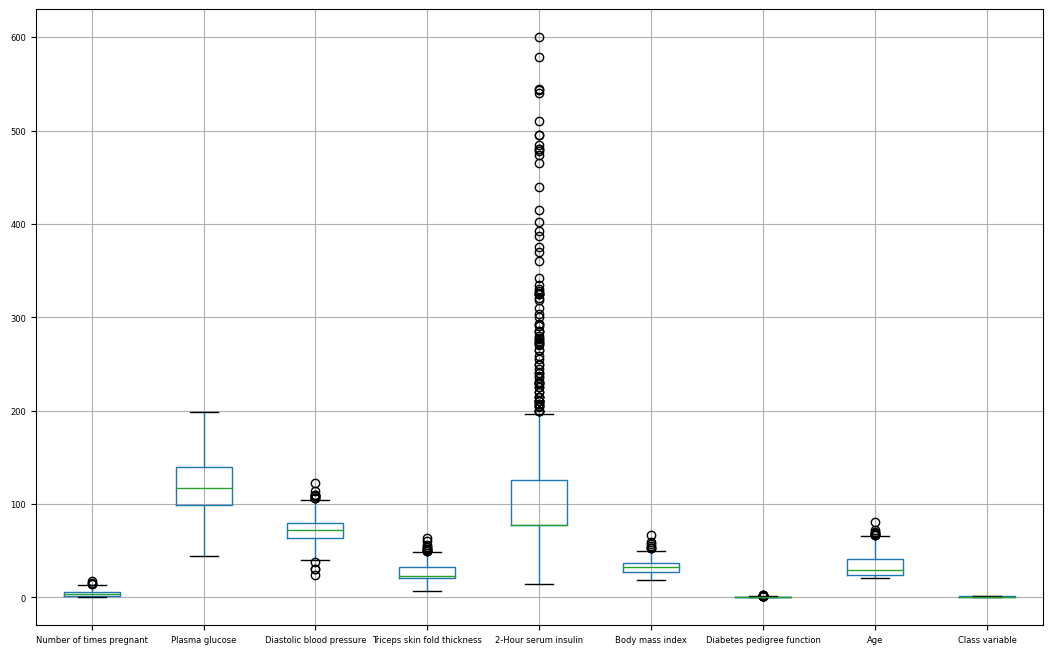

In [ ]:
data.boxplot(figsize=(13, 8),fontsize=6)
plt.show()

In [ ]:
# StandarScaler z=(x-mean)/std
X = data.drop('Class variable', axis=1)
y = data['Class variable']
mean = X.describe().loc['mean']
std = X.describe().loc['std']

X = (X-mean)/std
X


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,0.635578,0.884916,-0.020847,0.918860,-0.445225,0.172346,0.484309,1.436909
1,-0.846661,-1.206014,-0.515807,0.274170,-0.445225,-0.849099,-0.364202,-0.186800
2,1.228474,2.046544,-0.680793,-0.650954,-0.445225,-1.330638,0.622653,-0.101342
3,-0.846661,-1.073257,-0.515807,-0.370520,-0.247435,-0.630218,-0.929875,-1.041385
4,-1.143109,0.519833,-2.660632,0.918860,0.626179,1.558592,5.590743,-0.015884
...,...,...,...,...,...,...,...,...
763,1.821369,-0.674984,0.309126,2.315687,0.767846,0.070201,-0.917578,2.547869
764,-0.550213,0.021993,-0.185833,0.059273,-0.445225,0.639292,-0.398019,-0.528634
765,0.339130,-0.011197,-0.020847,-0.370520,-0.034934,-0.907468,-0.690079,-0.272259
766,-0.846661,0.154750,-1.010766,-0.650954,-0.445225,-0.338377,-0.370350,1.180534


CHƯƠNG IV: Trực quan hóa dữ liệu.

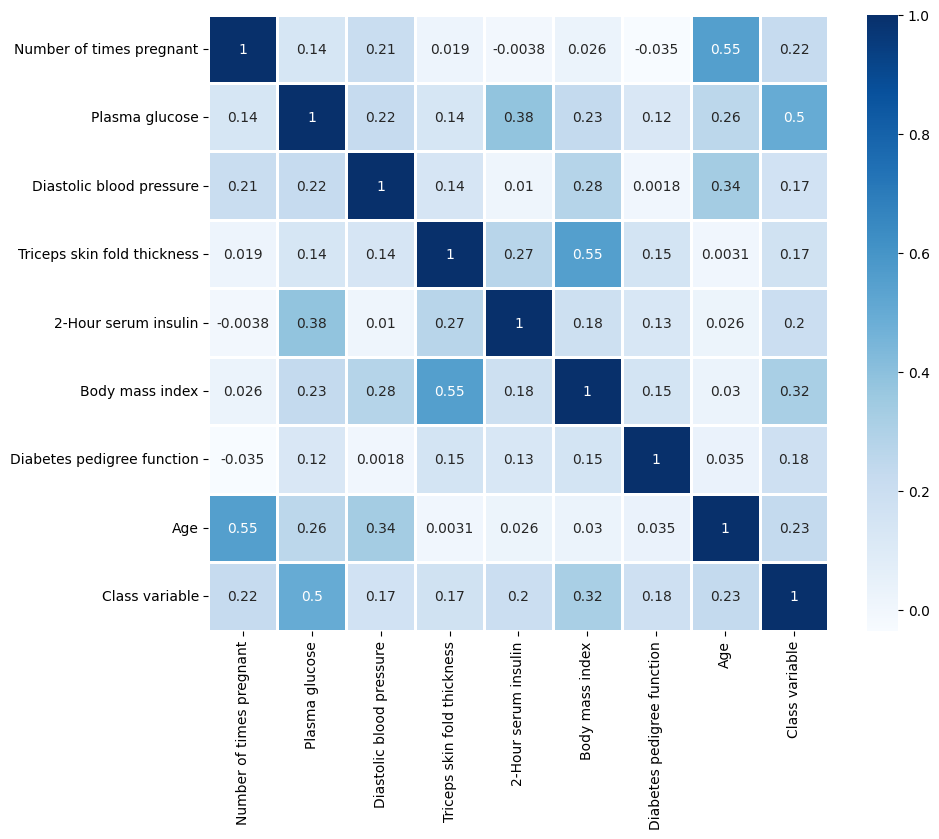

In [ ]:
df_clean = pd.concat([X, y], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, linewidths=1, linecolor='w', cmap='Blues')
plt.show()

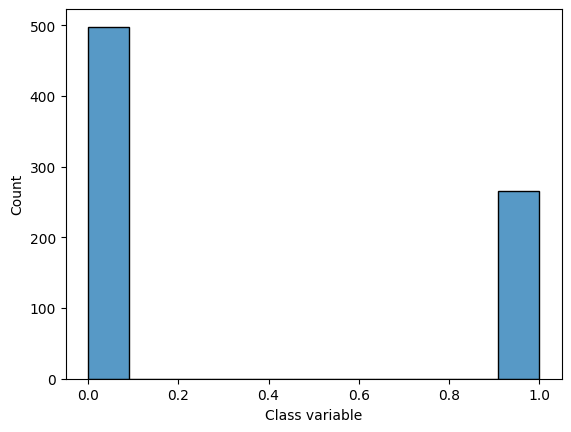

In [ ]:
sns.histplot(df_clean['Class variable'])
plt.show()

CHƯƠNG V: Xây dựng mô hình

In [ ]:
def average_round(x: list):
    return round(np.mean(x), 3)

models = []
models.append(['Tree', DecisionTreeClassifier(criterion='entropy')])
models.append(['Naive Bayes', GaussianNB()])
models.append(['KNN', KNeighborsClassifier(n_neighbors=5)])
models.append(['LogisticRegression', LogisticRegression(max_iter=10000)])
X = X.to_numpy()
y = y.to_numpy()

table_result = pd.DataFrame(
    columns=['Model', 'Accuracy', 'Recall', 'Precision score', 'f1 score'])
for name, model in models:
    result = cross_validate(model, X, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'))
    table_result.loc[len(table_result)] = [name,
                                           average_round(result['test_accuracy']),
                                           average_round(result['test_precision']),
                                           average_round(result['test_recall']),
                                           average_round(result['test_f1'])]
print(table_result)

                Model  Accuracy  Recall  Precision score  f1 score
0                Tree     0.703   0.576            0.579     0.575
1         Naive Bayes     0.741   0.639            0.583     0.608
2                 KNN     0.738   0.636            0.583     0.607
3  LogisticRegression     0.770   0.717            0.568     0.632


Từ bảng kết quả ta thấy mô hình hồi quy Logistic có hiệu quả nhất nên bước tiếp theo sẽ chọn 1 mô hình tốt nhất từ 10 Ford

In [ ]:
kf = KFold(n_splits=10)
accuracyList = []
logisticList = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression(max_iter=100000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracyList.append(accuracy)
    logisticList.append(model)

print('Accuracy: ')
for id, i in enumerate(accuracyList):
    print(f'Ford {id}: {i}')
print('Average: ', np.mean(accuracyList))


Accuracy: 
Ford 0: 0.7012987012987013
Ford 1: 0.8311688311688312
Ford 2: 0.7792207792207793
Ford 3: 0.6623376623376623
Ford 4: 0.7894736842105263
Ford 5: 0.7894736842105263
Ford 6: 0.8157894736842105
Ford 7: 0.8157894736842105
Ford 8: 0.7236842105263158
Ford 9: 0.8026315789473685
Average:  0.7710868079289132


Model ở ford 1 có hiệu quả nhất nên ta sẽ lấy nó để dự đoán

In [ ]:
print('Model coeff: ', logisticList[1].coef_)
print('Model bias: ', logisticList[1].intercept_)

Model coeff:  [[ 0.47844875  1.12688418 -0.12925737  0.01687571 -0.02616857  0.63166724
   0.33044772  0.07085538]]
Model bias:  [-0.85495231]
